In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt



# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with =engine)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station



In [9]:
# Create a session

session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
end_date

'2017-08-23'

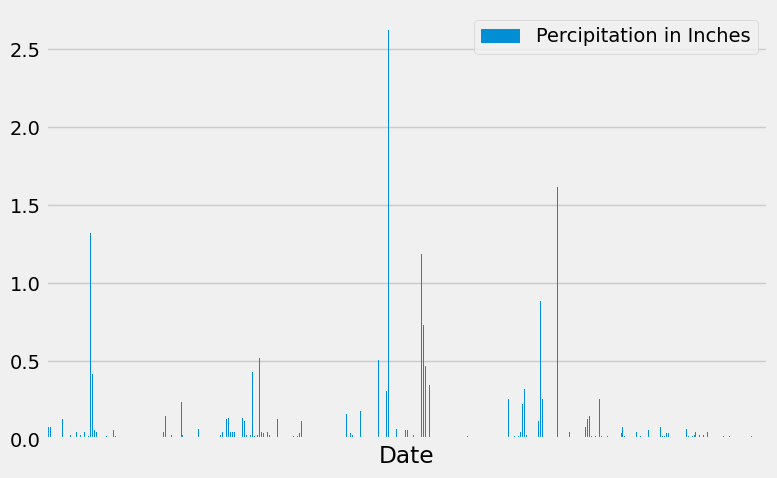

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
start_date = dt.date(2016, 8, 23)

# # Calculate the date one year from the last date in data set.
sel = [Measurement.date,
       Measurement.prcp]
year_of_data = session.query(*sel).\
    filter(Measurement.date >= start_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
# year_of_data
sel = [Measurement.date,
       Measurement.prcp]



# Perform a query to retrieve the data and precipitation scores
year_of_data_df = pd.DataFrame(year_of_data, columns=['Date', 'Percipitation in Inches'])
year_of_data_df.set_index('Date', inplace=True)
# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

year_of_data_df.plot.bar(figsize=(8,5))
plt.xticks([])
plt.tight_layout()
plt.show()

In [12]:
year_of_data_df.describe()

,Percipitation in Inches
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
print(station_count)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# join_table = session.query(Measurement,Station).filter(Measurement.station == Station.station).all()

# join_table

station_entry_counts = session.query(Station.station, func.count(Measurement.station).label('entry_count')).\
    join(Measurement, Station.station == Measurement.station).\
    group_by(Station.id).all()

station_entry_counts

[('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519523', 2669),
 ('USC00519281', 2772),
 ('USC00511918', 1979),
 ('USC00516128', 2612)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
high_count = 0
for x in station_entry_counts:
    if x[1] > high_count:
        high_count = x[1]
most_active_station = ''
for x in station_entry_counts:
    if x[1] == high_count:
        most_active_station = x


print(most_active_station[0])

sell = [Measurement.station,
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]
most_active_data_avg = session.query(*sell).\
    filter(Measurement.station == most_active_station[0]).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
most_active_data_avg

USC00519281


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [25]:
selll = [Measurement.station,
        Measurement.tobs,
        Measurement.date]
most_active_data = session.query(*selll).\
    filter(Measurement.station == most_active_station[0]).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
most_active_data_df = pd.DataFrame(most_active_data)

# year_of_data_df


year_of_data_with_station = session.query(*selll).\
    filter(Measurement.date >= start_date, Measurement.station == most_active_station[0] ).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
# year_of_data_with_station

year_of_data_with_station_df = pd.DataFrame(year_of_data_with_station, columns= ['station', 'temp', 'Date'])
year_of_data_with_station_df.dtypes

station     object
temp       float64
Date        object
dtype: object

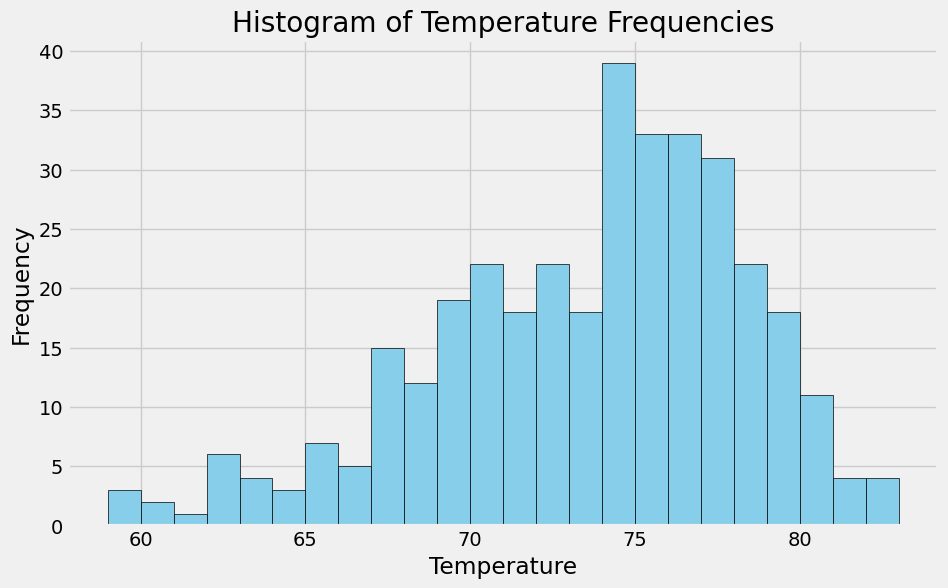

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(year_of_data_with_station_df['temp'], bins=range(int(year_of_data_with_station_df['temp'].min()), int(year_of_data_with_station_df['temp'].max()) + 1), color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Frequencies')

# Display the plot
plt.show()

# Close Session

In [27]:
# Close Session
session.close()
